In [1]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud

In [3]:
# 한글 문장 리스트
sentences = [
    "오늘 날씨가 좋아서 나들이 가고 싶다.",
    "이 영화는 정말 재미있었어요.",
    "맛있는 음식을 먹으러 갈까요?",
    "운동을 하면 건강에 좋아지는 것 같아요.",
    "공부하기 싫어서 미루고 있어요.",
    "여행 계획을 세우고 있는데 어디로 갈까요?",
    "좋은 책을 읽으면 마음이 편안해져요.",
    "오늘은 친구들과 만나서 재미있게 놀았어요.",
    "새로운 언어를 배우는 것은 어려워도 흥미로워요.",
    "주말에 가족들과 함께 시간을 보내기로 했습니다."
]

sentences = [
    "이 영화 너무 재밌어요! 강추합니다.",
    "배우들의 연기력이 정말 대단했어요. 감동적인 영화였습니다.",
    "스토리가 흥미진진하고 긴장감 넘치는 영화였어요.",
    "음악과 비주얼이 환상적으로 어우러져서 정말 멋진 영화였습니다.",
    "전개가 예상치 못한 방향으로 흘러가서 더욱 흥미로웠어요.",
    "천재적인 시나리오와 연출로 완성도 높은 작품이었습니다.",
    "주인공의 성장 이야기가 잘 그려져 있어 공감할 수 있었습니다.",
    "캐릭터들의 매력과 유머감각이 돋보여서 웃음을 자아내는 재미도 있었습니다.",
    "시간 가는 줄 모르고 봤네요. 너무 재미있었습니다!",
    "영상美와 색감, 조명 등 시각적인 요소들도 아름다웠습니다."
]

## 자연어 처리 위한 단어 생성_형태분석기 적용

In [10]:
from mecab import MeCab

In [11]:
mecab = MeCab()

In [14]:
## for문 돌려서 품사_tagging한다. 
mecab.nouns(sentences[0]) ## 명사 확인

['영화', '강추']

In [15]:
mecab.pos(sentences[0]) ## 품사 확인

[('이', 'MM'),
 ('영화', 'NNG'),
 ('너무', 'MAG'),
 ('재밌', 'VA'),
 ('어요', 'EF'),
 ('!', 'SF'),
 ('강추', 'NNG'),
 ('합니다', 'XSV+EF'),
 ('.', 'SF')]

- 느낌표 필요함_감성분석에 사용됨.
- UNKNOWN : matching때 확인 불가함. 

In [22]:
morphs_list = list()
for sentence in sentences :
    morphs = mecab.nouns(sentence)
    morphs_list = morphs_list + morphs # append대신에 +를 함. 
## 각각 list를 +로 결합시켜 하나의 list로 만들어버림
## append는 list가 쌓이는데 그 방식 NONO-단어를 count로 하고싶음. 

morphs_list

['영화',
 '강추',
 '배우',
 '연기력',
 '감동',
 '영화',
 '스토리',
 '긴장감',
 '영화',
 '음악',
 '비주얼',
 '환상',
 '영화',
 '전개',
 '예상',
 '방향',
 '흥미',
 '천재',
 '시나리오',
 '연출',
 '완성',
 '작품',
 '주인공',
 '성장',
 '이야기',
 '공감',
 '수',
 '캐릭터',
 '매력',
 '유머',
 '감각',
 '웃음',
 '재미',
 '시간',
 '줄',
 '영상',
 '美',
 '색감',
 '조명',
 '등',
 '시각',
 '요소']

In [24]:
#### 분석에 필요 없는것? 한글자는 뺸다. 주로 한글자 이하는 빠짐. 
#### append 전에 명사를 text로 변경해서 넣어준다. 

In [26]:
from collections import Counter
nouns_count = Counter(morphs_list)

In [29]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordcloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordcloud.generate_from_frequencies(nouns_count)

In [30]:
# count 
wordcloud.words_ 

{'영화': 1.0,
 '강추': 0.25,
 '배우': 0.25,
 '연기력': 0.25,
 '감동': 0.25,
 '스토리': 0.25,
 '긴장감': 0.25,
 '음악': 0.25,
 '비주얼': 0.25,
 '환상': 0.25,
 '전개': 0.25,
 '예상': 0.25,
 '방향': 0.25,
 '흥미': 0.25,
 '천재': 0.25,
 '시나리오': 0.25,
 '연출': 0.25,
 '완성': 0.25,
 '작품': 0.25,
 '주인공': 0.25,
 '성장': 0.25,
 '이야기': 0.25,
 '공감': 0.25,
 '수': 0.25,
 '캐릭터': 0.25,
 '매력': 0.25,
 '유머': 0.25,
 '감각': 0.25,
 '웃음': 0.25,
 '재미': 0.25,
 '시간': 0.25,
 '줄': 0.25,
 '영상': 0.25,
 '美': 0.25,
 '색감': 0.25,
 '조명': 0.25,
 '등': 0.25,
 '시각': 0.25,
 '요소': 0.25}

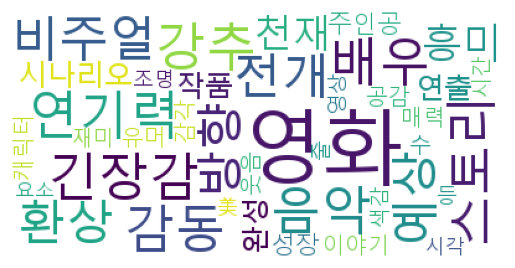

In [31]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

In [23]:
# "오늘 날씨가 좋아서 나들이 가고 싶다." -> 6개 
# "이 영화는 정말 재미있었어요." -> 4개 

# 문장으로 합치기
text = ' '.join(sentences)
text 

'이 영화 너무 재밌어요! 강추합니다. 배우들의 연기력이 정말 대단했어요. 감동적인 영화였습니다. 스토리가 흥미진진하고 긴장감 넘치는 영화였어요. 음악과 비주얼이 환상적으로 어우러져서 정말 멋진 영화였습니다. 전개가 예상치 못한 방향으로 흘러가서 더욱 흥미로웠어요. 천재적인 시나리오와 연출로 완성도 높은 작품이었습니다. 주인공의 성장 이야기가 잘 그려져 있어 공감할 수 있었습니다. 캐릭터들의 매력과 유머감각이 돋보여서 웃음을 자아내는 재미도 있었습니다. 시간 가는 줄 모르고 봤네요. 너무 재미있었습니다! 영상美와 색감, 조명 등 시각적인 요소들도 아름다웠습니다.'

In [5]:
# 단어로 쪼개기 
text_split = text.split()
text_split

['이',
 '영화',
 '너무',
 '재밌어요!',
 '강추합니다.',
 '배우들의',
 '연기력이',
 '정말',
 '대단했어요.',
 '감동적인',
 '영화였습니다.',
 '스토리가',
 '흥미진진하고',
 '긴장감',
 '넘치는',
 '영화였어요.',
 '음악과',
 '비주얼이',
 '환상적으로',
 '어우러져서',
 '정말',
 '멋진',
 '영화였습니다.',
 '전개가',
 '예상치',
 '못한',
 '방향으로',
 '흘러가서',
 '더욱',
 '흥미로웠어요.',
 '천재적인',
 '시나리오와',
 '연출로',
 '완성도',
 '높은',
 '작품이었습니다.',
 '주인공의',
 '성장',
 '이야기가',
 '잘',
 '그려져',
 '있어',
 '공감할',
 '수',
 '있었습니다.',
 '캐릭터들의',
 '매력과',
 '유머감각이',
 '돋보여서',
 '웃음을',
 '자아내는',
 '재미도',
 '있었습니다.',
 '시간',
 '가는',
 '줄',
 '모르고',
 '봤네요.',
 '너무',
 '재미있었습니다!',
 '영상美와',
 '색감,',
 '조명',
 '등',
 '시각적인',
 '요소들도',
 '아름다웠습니다.']

In [6]:
# counter를 이용해서 중복 여부 count
from collections import Counter
Counter(text_split)

Counter({'이': 1,
         '영화': 1,
         '너무': 2,
         '재밌어요!': 1,
         '강추합니다.': 1,
         '배우들의': 1,
         '연기력이': 1,
         '정말': 2,
         '대단했어요.': 1,
         '감동적인': 1,
         '영화였습니다.': 2,
         '스토리가': 1,
         '흥미진진하고': 1,
         '긴장감': 1,
         '넘치는': 1,
         '영화였어요.': 1,
         '음악과': 1,
         '비주얼이': 1,
         '환상적으로': 1,
         '어우러져서': 1,
         '멋진': 1,
         '전개가': 1,
         '예상치': 1,
         '못한': 1,
         '방향으로': 1,
         '흘러가서': 1,
         '더욱': 1,
         '흥미로웠어요.': 1,
         '천재적인': 1,
         '시나리오와': 1,
         '연출로': 1,
         '완성도': 1,
         '높은': 1,
         '작품이었습니다.': 1,
         '주인공의': 1,
         '성장': 1,
         '이야기가': 1,
         '잘': 1,
         '그려져': 1,
         '있어': 1,
         '공감할': 1,
         '수': 1,
         '있었습니다.': 2,
         '캐릭터들의': 1,
         '매력과': 1,
         '유머감각이': 1,
         '돋보여서': 1,
         '웃음을': 1,
         '자아내는': 1,
         '재미도': 1,
         '시간'

In [7]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_text(text)

In [8]:
# count 
wordCloud.words_ 

{'너무': 1.0,
 '정말': 1.0,
 '영화였습니다': 1.0,
 '있었습니다': 1.0,
 '이': 0.5,
 '영화': 0.5,
 '재밌어요': 0.5,
 '강추합니다': 0.5,
 '배우들의': 0.5,
 '연기력이': 0.5,
 '대단했어요': 0.5,
 '감동적인': 0.5,
 '스토리가': 0.5,
 '흥미진진하고': 0.5,
 '긴장감': 0.5,
 '넘치는': 0.5,
 '영화였어요': 0.5,
 '음악과': 0.5,
 '비주얼이': 0.5,
 '환상적으로': 0.5,
 '어우러져서': 0.5,
 '멋진': 0.5,
 '전개가': 0.5,
 '예상치': 0.5,
 '못한': 0.5,
 '방향으로': 0.5,
 '흘러가서': 0.5,
 '더욱': 0.5,
 '흥미로웠어요': 0.5,
 '천재적인': 0.5,
 '시나리오와': 0.5,
 '연출로': 0.5,
 '완성도': 0.5,
 '높은': 0.5,
 '작품이었습니다': 0.5,
 '주인공의': 0.5,
 '성장': 0.5,
 '이야기가': 0.5,
 '잘': 0.5,
 '그려져': 0.5,
 '있어': 0.5,
 '공감할': 0.5,
 '수': 0.5,
 '캐릭터들의': 0.5,
 '매력과': 0.5,
 '유머감각이': 0.5,
 '돋보여서': 0.5,
 '웃음을': 0.5,
 '자아내는': 0.5,
 '재미도': 0.5,
 '시간': 0.5,
 '가는': 0.5,
 '줄': 0.5,
 '모르고': 0.5,
 '봤네요': 0.5,
 '재미있었습니다': 0.5,
 '영상美와': 0.5,
 '색감': 0.5,
 '조명': 0.5,
 '등': 0.5,
 '시각적인': 0.5,
 '요소들도': 0.5,
 '아름다웠습니다': 0.5}

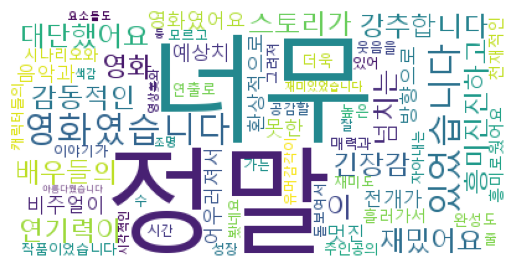

In [9]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()